In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sarlren/isic16")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/isic16


In [ ]:
import subprocess

In [2]:
subprocess.call("git clone https://github.com/WuJunde/MedSegDiff.git", shell=True)
subprocess.call("mv MedSegDiff/* ./", shell=True)

Cloning into 'MedSegDiff'...
remote: Enumerating objects: 716, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 716 (delta 340), reused 248 (delta 248), pack-reused 319 (from 2)
Receiving objects: 100% (716/716), 3.90 MiB | 12.94 MiB/s, done.
Resolving deltas: 100% (396/396), done.


In [3]:
# bugged section: x=x[:,-1:,...]  #loss is only calculated on the last channel, not on the input brain MR image
# becomes:
# x=x[:,-1:,...]\n        if x.shape != model_output.shape:\n            model_output = model_output[:,0,...]
subprocess.call("sed -i 's/.*x=x[:,-1:,...].*/        x=x[:,-1:,...]\n        if x.shape != model_output.shape:\n            model_output = model_output[:,[0],...]/' /content/guided_diffusion/gaussian_diffusion.py", shell=True)
subprocess.call("sed -n '275,+20p'  /content/guided_diffusion/gaussian_diffusion.py", shell=True)

        x=x[:,-1:,...]
        if x.shape != model_output.shape:
            model_output = model_output[:,[0],...]
        if self.model_var_type in [ModelVarType.LEARNED, ModelVarType.LEARNED_RANGE]:
            assert model_output.shape == (B, C * 2, *x.shape[2:])
            model_output, model_var_values = th.split(model_output, C, dim=1)
            if self.model_var_type == ModelVarType.LEARNED:
                model_log_variance = model_var_values
                model_variance = th.exp(model_log_variance)
            else:
                min_log = _extract_into_tensor(
                    self.posterior_log_variance_clipped, t, x.shape
                )
                max_log = _extract_into_tensor(np.log(self.betas), t, x.shape)
                # The model_var_values is [-1, 1] for [min_var, max_var].
                frac = (model_var_values + 1) / 2
                model_log_variance = frac * max_log + (1 - frac) * min_log
                model_variance = th.exp(model_log_

In [4]:
subprocess.call("mkdir /kaggle", shell=True)

mkdir: cannot create directory ‘/kaggle’: File exists


In [5]:
subprocess.call("mkdir /kaggle/working", shell=True)

In [6]:
subprocess.call("mkdir /kaggle/working/out", shell=True)

In [7]:
subprocess.call("mkdir /kaggle/working/isic", shell=True)

In [8]:
subprocess.call("cp -r /content/guided_diffusion /content/scripts/guided_diffusion", shell=True)

In [9]:
subprocess.call("cp -r "+path+"/ISBI2016_ISIC_Part1_Test_Data/* /kaggle/working/isic/", shell=True)
subprocess.call("cp -r "+path+"/ISBI2016_ISIC_Part1_Training_Data/* /kaggle/working/isic/", shell=True)
subprocess.call("cp -r "+path+"/ISBI2016_ISIC_Part1_Training_GroundTruth/* /kaggle/working/isic/", shell=True)
subprocess.call("cp -r "+path+"/ISBI2016_ISIC_Part1_Test_GroundTruth/* /kaggle/working/isic/", shell=True)
subprocess.call("cp "+path+"/ISBI2016_ISIC_Part3B_Test_GroundTruth.csv /kaggle/working/isic/", shell=True)
subprocess.call("cp "+path+"/ISBI2016_ISIC_Part3B_Training_GroundTruth.csv /kaggle/working/isic/", shell=True)

0

In [10]:
!pip install blobfile
!pip install nibabel
!pip install visdom
!pip install torchsummary
!pip install batchgenerators
!pip install mpi4py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=c86de94669e4a99b92847a4c9538560247e4f6315cb3a49bc943c5669027d8c2
  Stored in directory: /root/.cache/pip/wheels/fa/a4/bb/2be445c295d88a74f9c0a4232f04860ca489a5c7c57eb959d9
Successfully built visdom
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 12.6 MB/s eta 0:00:00
  Created wheel for batchgenerators: filename=batchgenerators-0.25.1-py3-none-any.whl size=93088 sha256=966cee3a16b73e014c5508f1fa3b0e75630c990d69354a42463ee91d904f9a25
  Stored in directory: /root/.cache/pip/wheels/56/11/c7/fadca30e054c60

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.3/466.3 kB 33.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-4.0.3-cp311-cp311-linux_x86_64.whl size=4458271 sha256=eb87a717f843039bb6dd05f4ee2bfd696a64e10135c6ccac5d773720651ef997
  Stored in directory: /root/.cache/pip/wheels/5c/56/17/bf6ba37aa971a191a8b9eaa188bf5ec855b8911c1c56fb1f84
Successfully built mpi4py


In [11]:
import pdb

In [12]:
import sys
import os
sys.path.append("/content/scripts")
sys.path.append("./")
from ssl import OP_NO_TLSv1
import nibabel as nib
import sys
import random
import numpy as np
import time
from PIL import Image
import torch.distributed as dist
import torchvision.utils as vutils
from guided_diffusion import dist_util, logger
from guided_diffusion.resample import create_named_schedule_sampler
from guided_diffusion.bratsloader import BRATSDataset, BRATSDataset3D
from guided_diffusion.isicloader import ISICDataset
from guided_diffusion.custom_dataset_loader import CustomDataset
from guided_diffusion.script_util import (
    NUM_CLASSES,
    model_and_diffusion_defaults,
    create_model_and_diffusion,
    args_to_dict,
    add_dict_to_argparser,
)
import torch as th
from guided_diffusion.train_util import TrainLoop
from guided_diffusion.utils import staple
import torchvision.transforms as transforms
from torchsummary import summary

from dataclasses import dataclass

@dataclass
class Args:
  data_name: str
  data_dir: str
  out_dir: str
  image_size: int
  num_channels: int
  class_cond: bool
  num_res_blocks: int
  num_heads: int
  learn_sigma: bool
  use_scale_shift_norm: bool
  attention_resolutions: str
  diffusion_steps: int
  noise_schedule: str
  rescale_learned_sigmas: bool
  rescale_timesteps: bool
  lr: float
  batch_size: int
  microbatch: int
  ema_rate: str
  log_interval: int
  save_interval: int
  resume_checkpoint: str
  schedule_sampler: str
  weight_decay: float
  lr_anneal_steps: int
  use_fp16: bool
  fp16_scale_growth: float
  gpu_dev: str
  multi_gpu: str
  in_ch: int
  num_heads_upsample: int
  num_head_channels: int
  resblock_updown: bool
  dpm_solver: bool
  version: str
  channel_mult: str
  dropout: float
  use_checkpoint: bool
  use_new_attention_order: bool
  timestep_respacing: str
  use_kl: bool
  predict_xstart: bool
  model_path: str
  num_ensemble: int
  use_ddim: bool
  clip_denoised: bool
  debug: bool
  num_samples: int

argsdict = dict(
  data_name = 'ISIC',
  data_dir = "/kaggle/working/isic",
  out_dir = "/kaggle/working/out",
  image_size = 256,
  num_channels = 128,
  class_cond = False,
  num_res_blocks = 2,
  num_heads = 1,
  learn_sigma = True,
  use_scale_shift_norm = False,
  attention_resolutions = "16",
  diffusion_steps = 1000,
  noise_schedule = 'linear',
  rescale_learned_sigmas = False,
  rescale_timesteps = False,
  lr = 1e-4,
  batch_size = 4,
  microbatch = -1,  # -1 disables microbatches
  ema_rate = "0.9999",  # comma-separated list of EMA values
  log_interval = 100,
  save_interval = 5000,
  resume_checkpoint = None, #"/results/pretrainedmodel.pt"
  schedule_sampler="uniform",
  weight_decay=0.0,
  lr_anneal_steps=400, # used for early stopping
  use_fp16=False,
  fp16_scale_growth=1e-3,
  gpu_dev = "0",
  multi_gpu = None, #"0,1,2"

  # useful for sampling only:
  model_path = "/kaggle/working/out/savedmodel000400.pt",
  num_ensemble = 5,
  use_ddim = False, #originally False
  clip_denoised = True,
  debug = False, # can always change
  num_samples = 5,
)
argsdict.update(model_and_diffusion_defaults())

args = Args(**argsdict)

seed=10
th.manual_seed(seed)
th.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)

In [25]:
def train():
    dist_util.setup_dist(args)
    logger.configure(dir = args.out_dir)

    logger.log("creating data loader...")

    if args.data_name == 'ISIC':
        tran_list = [transforms.Resize((args.image_size,args.image_size)), transforms.ToTensor(),]
        transform_train = transforms.Compose(tran_list)

        ds = ISICDataset(args, args.data_dir, transform_train)
        args.in_ch = 4
    elif args.data_name == 'BRATS':
        tran_list = [transforms.Resize((args.image_size,args.image_size)),]
        transform_train = transforms.Compose(tran_list)

        ds = BRATSDataset3D(args.data_dir, transform_train, test_flag=False)
        args.in_ch = 5
    else :
        tran_list = [transforms.Resize((args.image_size,args.image_size)), transforms.ToTensor(),]
        transform_train = transforms.Compose(tran_list)
        print("Your current directory : ",args.data_dir)
        ds = CustomDataset(args, args.data_dir, transform_train)
        args.in_ch = 4

    datal= th.utils.data.DataLoader(
        ds,
        batch_size=args.batch_size,
        shuffle=True)
    data = iter(datal)

    logger.log("creating model and diffusion...")

    model, diffusion = create_model_and_diffusion(
        **args_to_dict(args, model_and_diffusion_defaults().keys())
    )
    if args.multi_gpu:
        model = th.nn.DataParallel(model,device_ids=[int(id) for id in args.multi_gpu.split(',')])
        model.to(device = th.device('cuda', int(args.gpu_dev)))
    else:
        model.to(dist_util.dev())
    schedule_sampler = create_named_schedule_sampler(args.schedule_sampler, diffusion,  maxt=args.diffusion_steps)


    logger.log("training...")
    TrainLoop(
        model=model,
        diffusion=diffusion,
        classifier=None,
        data=data,
        dataloader=datal,
        batch_size=args.batch_size,
        microbatch=args.microbatch,
        lr=args.lr,
        ema_rate=args.ema_rate,
        log_interval=args.log_interval,
        save_interval=args.save_interval,
        resume_checkpoint=args.resume_checkpoint,
        use_fp16=args.use_fp16,
        fp16_scale_growth=args.fp16_scale_growth,
        schedule_sampler=schedule_sampler,
        weight_decay=args.weight_decay,
        lr_anneal_steps=args.lr_anneal_steps,
    ).run_loop()

def visualize(img):
    _min = img.min()
    _max = img.max()
    normalized_img = (img - _min)/ (_max - _min)
    return normalized_img


def sample():
    dist_util.setup_dist(args)
    logger.configure(dir = args.out_dir)

    if args.data_name == 'ISIC':
        tran_list = [transforms.Resize((args.image_size,args.image_size)), transforms.ToTensor(),]
        transform_test = transforms.Compose(tran_list)

        ds = ISICDataset(args, args.data_dir, transform_test, mode = 'Test')
        args.in_ch = 4
    elif args.data_name == 'BRATS':
        tran_list = [transforms.Resize((args.image_size,args.image_size)),]
        transform_test = transforms.Compose(tran_list)

        ds = BRATSDataset3D(args.data_dir,transform_test)
        args.in_ch = 5
    else:
        tran_list = [transforms.Resize((args.image_size,args.image_size)), transforms.ToTensor()]
        transform_test = transforms.Compose(tran_list)

        ds = CustomDataset(args, args.data_dir, transform_test, mode = 'Test')
        args.in_ch = 4

    datal = th.utils.data.DataLoader(
        ds,
        batch_size=args.batch_size,
        shuffle=True)
    data = iter(datal)

    logger.log("creating model and diffusion...")

    model, diffusion = create_model_and_diffusion(
        **args_to_dict(args, model_and_diffusion_defaults().keys())
    )
    all_images = []


    state_dict = dist_util.load_state_dict(args.model_path, map_location="cpu")
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        # name = k[7:] # remove `module.`
        if 'module.' in k:
            new_state_dict[k[7:]] = v
            # load params
        else:
            new_state_dict = state_dict

    model.load_state_dict(new_state_dict)

    model.to(dist_util.dev())
    if args.use_fp16:
        model.convert_to_fp16()
    model.eval()
    for _ in range(args.num_samples):
        b, m, path = next(data)  #should return an image from the dataloader "data"
        c = th.randn_like(b[:, :1, ...])
        img = th.cat((b, c), dim=1)     #add a noise channel$
        if args.data_name == 'ISIC':
            slice_ID=path[0].split("_")[-1].split('.')[0]
        elif args.data_name == 'BRATS':
            # slice_ID=path[0].split("_")[2] + "_" + path[0].split("_")[4]
            slice_ID=path[0].split("_")[-3] + "_" + path[0].split("slice")[-1].split('.nii')[0]

        logger.log("sampling...")

        start = th.cuda.Event(enable_timing=True)
        end = th.cuda.Event(enable_timing=True)
        enslist = []

        for i in range(args.num_ensemble):  #this is for the generation of an ensemble of 5 masks.
            model_kwargs = {}
            start.record()
            sample_fn = (
                diffusion.p_sample_loop_known if not args.use_ddim else diffusion.ddim_sample_loop_known
            )
            # pdb.set_trace() #imbedded debug !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            # truncating model output after its internally calculated in dim 2 should fix the issue:
            # https://github.com/SuperMedIntel/MedSegDiff/issues/201
            # fixable by just editing gaussian_diffusion.py:346 to be permissive
            sample, x_noisy, org, cal, cal_out = sample_fn( # broken
                model,
                (args.batch_size, 3, args.image_size, args.image_size), img,
                step = args.diffusion_steps,
                clip_denoised=args.clip_denoised,
                model_kwargs=model_kwargs,
            )

            end.record()
            th.cuda.synchronize()
            print('time for 1 sample', start.elapsed_time(end))  #time measurement for the generation of 1 sample

            co = th.tensor(cal_out)
            if args.version == 'new':
                enslist.append(sample[:,-1,:,:])
            else:
                enslist.append(co)

            if args.debug:
                # print('sample size is',sample.size())
                # print('org size is',org.size())
                # print('cal size is',cal.size())
                if args.data_name == 'ISIC':
                    # s = th.tensor(sample)[:,-1,:,:].unsqueeze(1).repeat(1, 3, 1, 1)
                    o = th.tensor(org)[:,:-1,:,:]
                    c = th.tensor(cal).repeat(1, 3, 1, 1)
                    # co = co.repeat(1, 3, 1, 1)

                    s = sample[:,-1,:,:]
                    b,h,w = s.size()
                    ss = s.clone()
                    ss = ss.view(s.size(0), -1)
                    ss -= ss.min(1, keepdim=True)[0]
                    ss /= ss.max(1, keepdim=True)[0]
                    ss = ss.view(b, h, w)
                    ss = ss.unsqueeze(1).repeat(1, 3, 1, 1)

                    tup = (ss,o,c)
                elif args.data_name == 'BRATS':
                    s = th.tensor(sample)[:,-1,:,:].unsqueeze(1)
                    m = th.tensor(m.to(device = 'cuda:0'))[:,0,:,:].unsqueeze(1)
                    o1 = th.tensor(org)[:,0,:,:].unsqueeze(1)
                    o2 = th.tensor(org)[:,1,:,:].unsqueeze(1)
                    o3 = th.tensor(org)[:,2,:,:].unsqueeze(1)
                    o4 = th.tensor(org)[:,3,:,:].unsqueeze(1)
                    c = th.tensor(cal)

                    tup = (o1/o1.max(),o2/o2.max(),o3/o3.max(),o4/o4.max(),m,s,c,co)

                compose = th.cat(tup,0)
                vutils.save_image(compose, fp = os.path.join(args.out_dir, str(slice_ID)+'_output'+str(i)+".png"), nrow = 1, padding = 10)
        ensres = staple(th.stack(enslist,dim=0)).squeeze(0)
        vutils.save_image(ensres, fp = os.path.join(args.out_dir, str(slice_ID)+'_output_ens'+".png"), nrow = 1, padding = 10)

In [14]:
#! rm -r /content/scripts/guided_diffusion/

In [15]:
train()

Logging to /kaggle/working/out
creating data loader...
creating model and diffusion...
training...
---------------------------
| grad_norm    | 21.9     |
| loss         | 1        |
| loss_cal     | 0.386    |
| loss_cal_q0  | 0.482    |
| loss_cal_q2  | 0.374    |
| loss_cal_q3  | 0.315    |
| loss_diff    | 1        |
| loss_diff_q0 | 1.01     |
| loss_diff_q2 | 0.995    |
| loss_diff_q3 | 1.01     |
| loss_q0      | 1.01     |
| loss_q2      | 0.995    |
| loss_q3      | 1.01     |
| param_norm   | 227      |
| samples      | 4        |
| step         | 0        |
---------------------------
saving model 0...
saving model 0.9999...
---------------------------
| grad_norm    | 16.1     |
| loss         | 0.258    |
| loss_cal     | 0.236    |
| loss_cal_q0  | 0.221    |
| loss_cal_q1  | 0.242    |
| loss_cal_q2  | 0.245    |
| loss_cal_q3  | 0.238    |
| loss_diff    | 0.258    |
| loss_diff_q0 | 0.335    |
| loss_diff_q1 | 0.256    |
| loss_diff_q2 | 0.228    |
| loss_diff_q3 | 0.2

In [16]:
subprocess.call("ls /kaggle/working/out", shell=True)

emasavedmodel_0.9999_000000.pt	optsavedmodel000000.pt	savedmodel000000.pt
emasavedmodel_0.9999_000400.pt	optsavedmodel000400.pt	savedmodel000400.pt
log.txt				progress.csv


In [17]:
from IPython.display import FileLink
FileLink('/kaggle/working/out/optsavedmodel000000.pt')

/kaggle/working/out


/kaggle/working/out/optsavedmodel000000.pt

In [18]:
subprocess.call("tar -cf /kaggle/working/out/models.tar /kaggle/working/out", shell=True)

tar: Removing leading `/' from member names
tar: /kaggle/working/out/models.tar: file is the archive; not dumped


In [19]:
subprocess.call("ls /kaggle/working/out", shell=True)

emasavedmodel_0.9999_000000.pt	models.tar		progress.csv
emasavedmodel_0.9999_000400.pt	optsavedmodel000000.pt	savedmodel000000.pt
log.txt				optsavedmodel000400.pt	savedmodel000400.pt


In [20]:
subprocess.call("tar czvf /kaggle/working/out/model_tar2.tar.gz /kaggle/working/out", shell=True)

tar: Removing leading `/' from member names
/kaggle/working/out/
/kaggle/working/out/savedmodel000400.pt
/kaggle/working/out/savedmodel000000.pt
/kaggle/working/out/optsavedmodel000400.pt
/kaggle/working/out/emasavedmodel_0.9999_000000.pt
/kaggle/working/out/model_tar2.tar.gz
tar: /kaggle/working/out/model_tar2.tar.gz: file changed as we read it
/kaggle/working/out/optsavedmodel000000.pt
/kaggle/working/out/progress.csv
/kaggle/working/out/emasavedmodel_0.9999_000400.pt
/kaggle/working/out/log.txt
/kaggle/working/out/models.tar
tar: /kaggle/working/out: file changed as we read it


In [21]:
subprocess.call("ls -alh /kaggle/working/out/", shell=True)

total 13G
drwxr-xr-x 2 root root 4.0K May  3 20:57 .
drwxr-xr-x 4 root root 4.0K May  3 20:49 ..
-rw-r--r-- 1 root root 412M May  3 20:54 emasavedmodel_0.9999_000000.pt
-rw-r--r-- 1 root root 412M May  3 20:57 emasavedmodel_0.9999_000400.pt
-rw-r--r-- 1 root root 2.4K May  3 20:57 log.txt
-rw-r--r-- 1 root root 3.3G May  3 20:57 models.tar
-rw-r--r-- 1 root root 5.9G May  3 21:04 model_tar2.tar.gz
-rw-r--r-- 1 root root 823M May  3 20:54 optsavedmodel000000.pt
-rw-r--r-- 1 root root 823M May  3 20:57 optsavedmodel000400.pt
-rw-r--r-- 1 root root 1.1K May  3 20:56 progress.csv
-rw-r--r-- 1 root root 412M May  3 20:54 savedmodel000000.pt
-rw-r--r-- 1 root root 412M May  3 20:57 savedmodel000400.pt


In [22]:
subprocess.call("tar -tvf /kaggle/working/out/model_tar2.tar.gz", shell=True)

drwxr-xr-x root/root         0 2025-05-03 20:57 kaggle/working/out/
-rw-r--r-- root/root 431251992 2025-05-03 20:57 kaggle/working/out/savedmodel000400.pt
-rw-r--r-- root/root 431251992 2025-05-03 20:54 kaggle/working/out/savedmodel000000.pt
-rw-r--r-- root/root 862379209 2025-05-03 20:57 kaggle/working/out/optsavedmodel000400.pt
-rw-r--r-- root/root 431251992 2025-05-03 20:54 kaggle/working/out/emasavedmodel_0.9999_000000.pt
-rw-r--r-- root/root 1769996288 2025-05-03 20:59 kaggle/working/out/model_tar2.tar.gz
-rw-r--r-- root/root  862379209 2025-05-03 20:54 kaggle/working/out/optsavedmodel000000.pt
-rw-r--r-- root/root       1095 2025-05-03 20:56 kaggle/working/out/progress.csv
-rw-r--r-- root/root  431251992 2025-05-03 20:57 kaggle/working/out/emasavedmodel_0.9999_000400.pt
-rw-r--r-- root/root       2449 2025-05-03 20:57 kaggle/working/out/log.txt
-rw-r--r-- root/root 3449784320 2025-05-03 20:57 kaggle/working/out/models.tar


In [26]:
sample()

Logging to /kaggle/working/out
creating model and diffusion...
sampling...
no dpm-solver
time for 1 sample 78358.125
no dpm-solver


<ipython-input-25-a9836bbcf832>:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  co = th.tensor(cal_out)


time for 1 sample 77610.5625
no dpm-solver
time for 1 sample 77572.7109375
no dpm-solver
time for 1 sample 77519.3671875
no dpm-solver
time for 1 sample 79590.5078125
sampling...
no dpm-solver
time for 1 sample 77591.6328125
no dpm-solver
time for 1 sample 77992.9296875
no dpm-solver
time for 1 sample 77472.0703125
no dpm-solver
time for 1 sample 77523.296875
no dpm-solver
time for 1 sample 77695.7109375
sampling...
no dpm-solver
time for 1 sample 77517.328125
no dpm-solver
time for 1 sample 77499.8515625
no dpm-solver
time for 1 sample 77639.7265625
no dpm-solver
time for 1 sample 77698.6484375
no dpm-solver
time for 1 sample 77704.4453125
sampling...
no dpm-solver
time for 1 sample 77596.2890625
no dpm-solver
time for 1 sample 77649.71875
no dpm-solver
time for 1 sample 77503.8046875
no dpm-solver
time for 1 sample 77482.8671875
no dpm-solver
time for 1 sample 77115.6796875
sampling...
no dpm-solver
time for 1 sample 76869.5390625
no dpm-solver
time for 1 sample 76784.921875
no dpm-s

KeyboardInterrupt: 

In [27]:
subprocess.call("ls /kaggle/working/isic/ISBI2016_ISIC_Part1_Test_GroundTruth/", shell=True)

ISIC_0000003_Segmentation.png  ISIC_0009906_Segmentation.png
ISIC_0000012_Segmentation.png  ISIC_0009918_Segmentation.png
ISIC_0000013_Segmentation.png  ISIC_0009920_Segmentation.png
ISIC_0000014_Segmentation.png  ISIC_0009923_Segmentation.png
ISIC_0000015_Segmentation.png  ISIC_0009926_Segmentation.png
ISIC_0000020_Segmentation.png  ISIC_0009927_Segmentation.png
ISIC_0000022_Segmentation.png  ISIC_0009928_Segmentation.png
ISIC_0000023_Segmentation.png  ISIC_0009930_Segmentation.png
ISIC_0000027_Segmentation.png  ISIC_0009931_Segmentation.png
ISIC_0000036_Segmentation.png  ISIC_0009943_Segmentation.png
ISIC_0000037_Segmentation.png  ISIC_0009945_Segmentation.png
ISIC_0000040_Segmentation.png  ISIC_0009946_Segmentation.png
ISIC_0000043_Segmentation.png  ISIC_0009948_Segmentation.png
ISIC_0000052_Segmentation.png  ISIC_0009954_Segmentation.png
ISIC_0000053_Segmentation.png  ISIC_0009955_Segmentation.png
ISIC_0000056_Segmentation.png  ISIC_0009956_Segmentation.png
ISIC_0000057_Segmentatio

In [28]:
subprocess.call("ls /kaggle/working/out", shell=True)

0000371_output_ens.png	emasavedmodel_0.9999_000000.pt	optsavedmodel000000.pt
0001190_output_ens.png	emasavedmodel_0.9999_000400.pt	optsavedmodel000400.pt
0010206_output_ens.png	log.txt				progress.csv
0011090_output_ens.png	models.tar			savedmodel000000.pt
0011175_output_ens.png	model_tar2.tar.gz		savedmodel000400.pt


0000371_output_ens.png	emasavedmodel_0.9999_000000.pt	optsavedmodel000000.pt
0001190_output_ens.png	emasavedmodel_0.9999_000400.pt	optsavedmodel000400.pt
0010206_output_ens.png	log.txt				progress.csv
0011090_output_ens.png	models.tar			savedmodel000000.pt
0011175_output_ens.png	model_tar2.tar.gz		savedmodel000400.pt


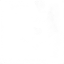

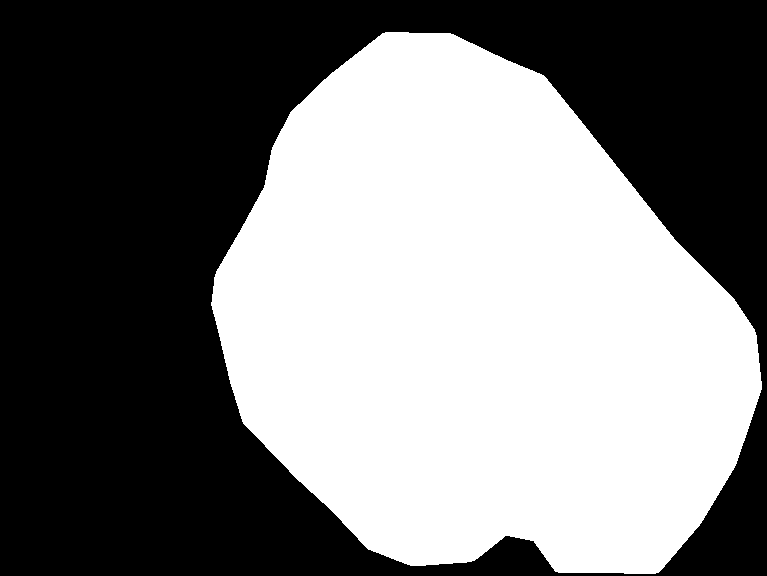

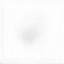

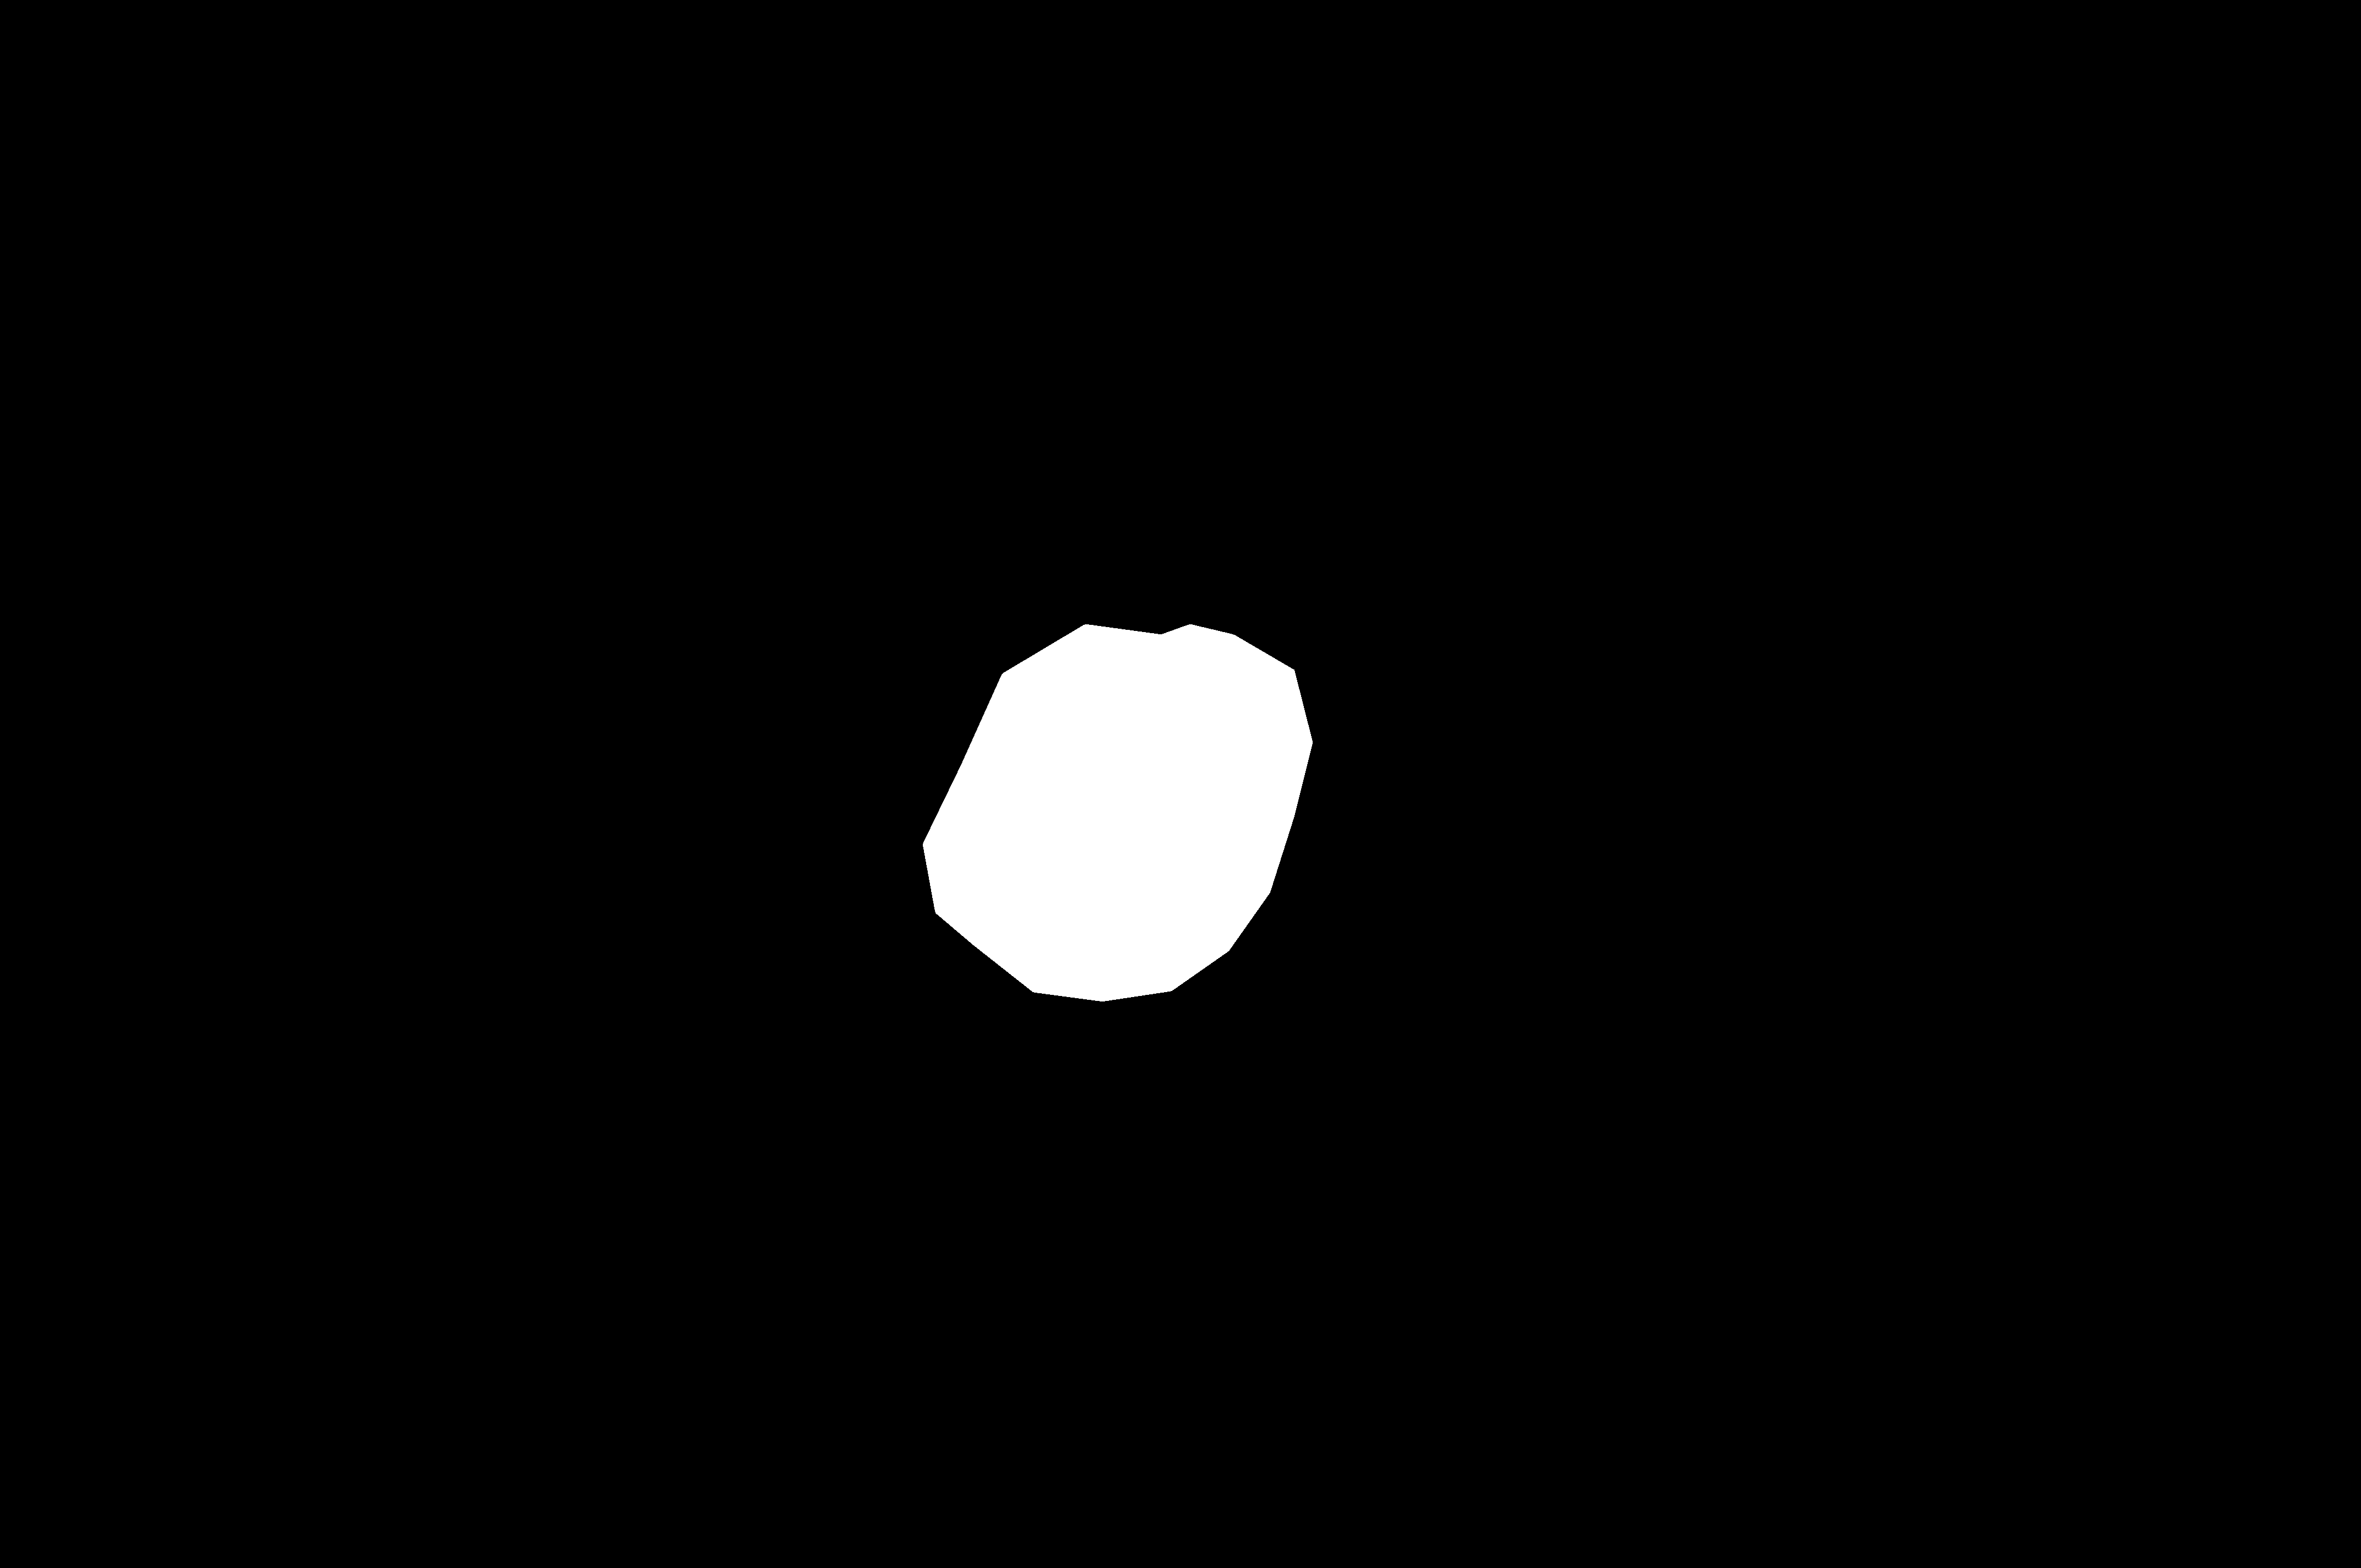

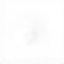

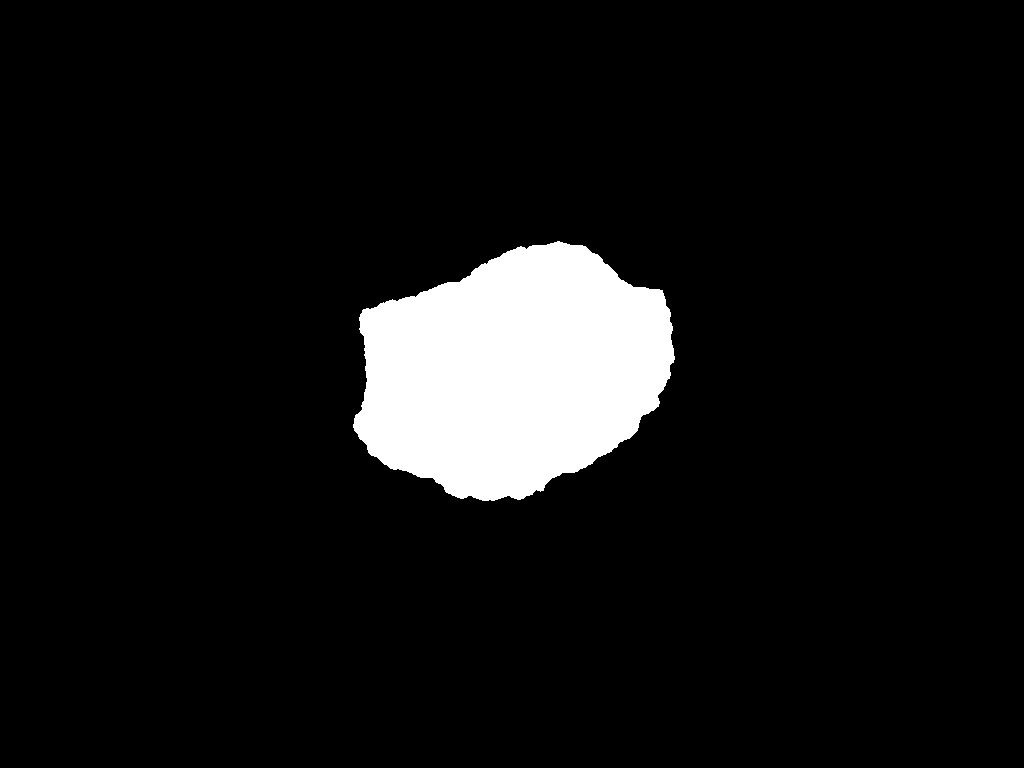

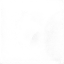

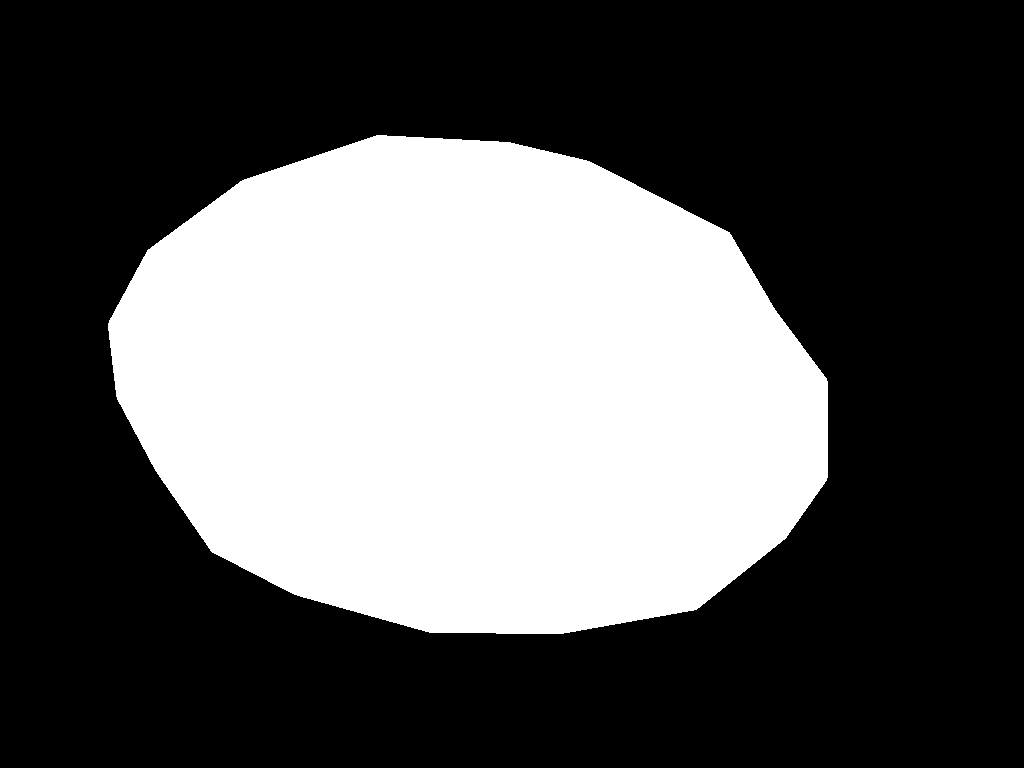

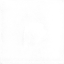

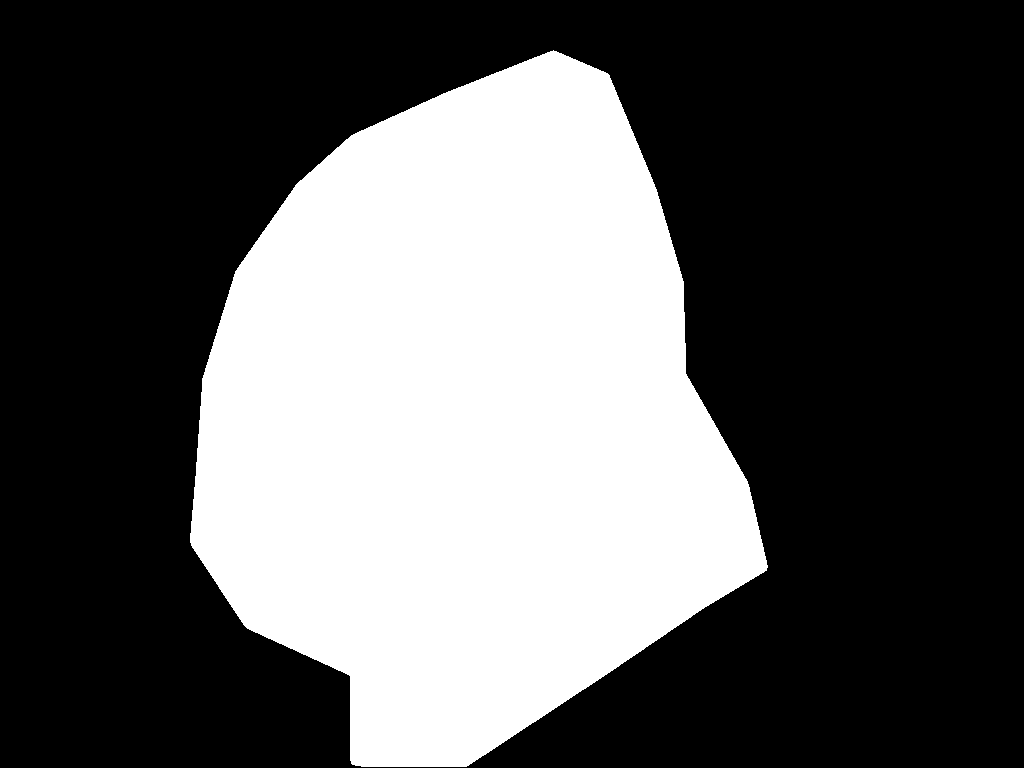

In [30]:
from matplotlib import pyplot as plt
from PIL import Image
display(Image.open('/kaggle/working/out/0000371_output_ens.png'))
display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_GroundTruth/ISIC_0000371_Segmentation.png'))
#display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_Data/ISIC_0000371.png'))

display(Image.open('/kaggle/working/out/0001190_output_ens.png'))
display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_GroundTruth/ISIC_0001190_Segmentation.png'))
#display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_Data/ISIC_0001190.png'))

display(Image.open('/kaggle/working/out/0010206_output_ens.png'))
display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_GroundTruth/ISIC_0010206_Segmentation.png'))
#display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_Data/ISIC_0010206.png'))

display(Image.open('/kaggle/working/out/0011090_output_ens.png'))
display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_GroundTruth/ISIC_0011090_Segmentation.png'))
#display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_Data/ISIC_001090.png'))

display(Image.open('/kaggle/working/out/0011175_output_ens.png'))
display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_GroundTruth/ISIC_0011175_Segmentation.png'))
#display(Image.open('/kaggle/working/isic/ISBI2016_ISIC_Part1_Test_Data/ISIC_0011175.png'))